# **Classification: Mobile Price affordability Prediction Case Study**

**Context:**
Mobile phones are the bestselling electronic devices as people keep updating their cell phones
whenever they find new features in a new device. Thousands of mobiles are sold daily, in such a
situation it is a very difficult task for someone who is planning to buy mobile phone , to decide
affordability of the mobile should be.

**Objectives:**
1.  Find and explore the factors which affect the affordability of the mobile
2.  To build machine learning classification model using Logistic Regression algorithm on mobile price affordability to classify the price range of mobiles.
3. Please note our task is to classify the price range of mobile phones and not to predict the actual prices

**Target Variable:** “price_category”

**Target Classes:**
0 (low cost)
1 (medium cost)
2 (high cost)
4 (very high cost)




# **Data Loading and Pre-Processing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Predictive Analysis/Practical4/Copy of mobile_phones.csv')
# returns the first 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_category
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
rows, columns = df.shape

print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 2000 rows and 21 columns.


The dataset has 21 coloumns and 2000 rows


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   blue            2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   fc              2000 non-null   int64  
 5   four_g          2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  pc              2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [ ]:

df.nunique()

,0
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


In [ ]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


No null values are present in the dataset.

# **Univariate Anlaysis**

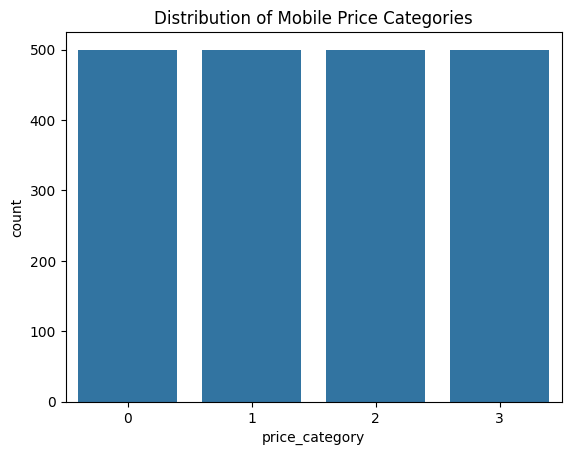

In [ ]:
# Plot the distribution of price_category (target variable)
sns.countplot(x='price_category', data=df)
plt.title('Distribution of Mobile Price Categories')
plt.show()


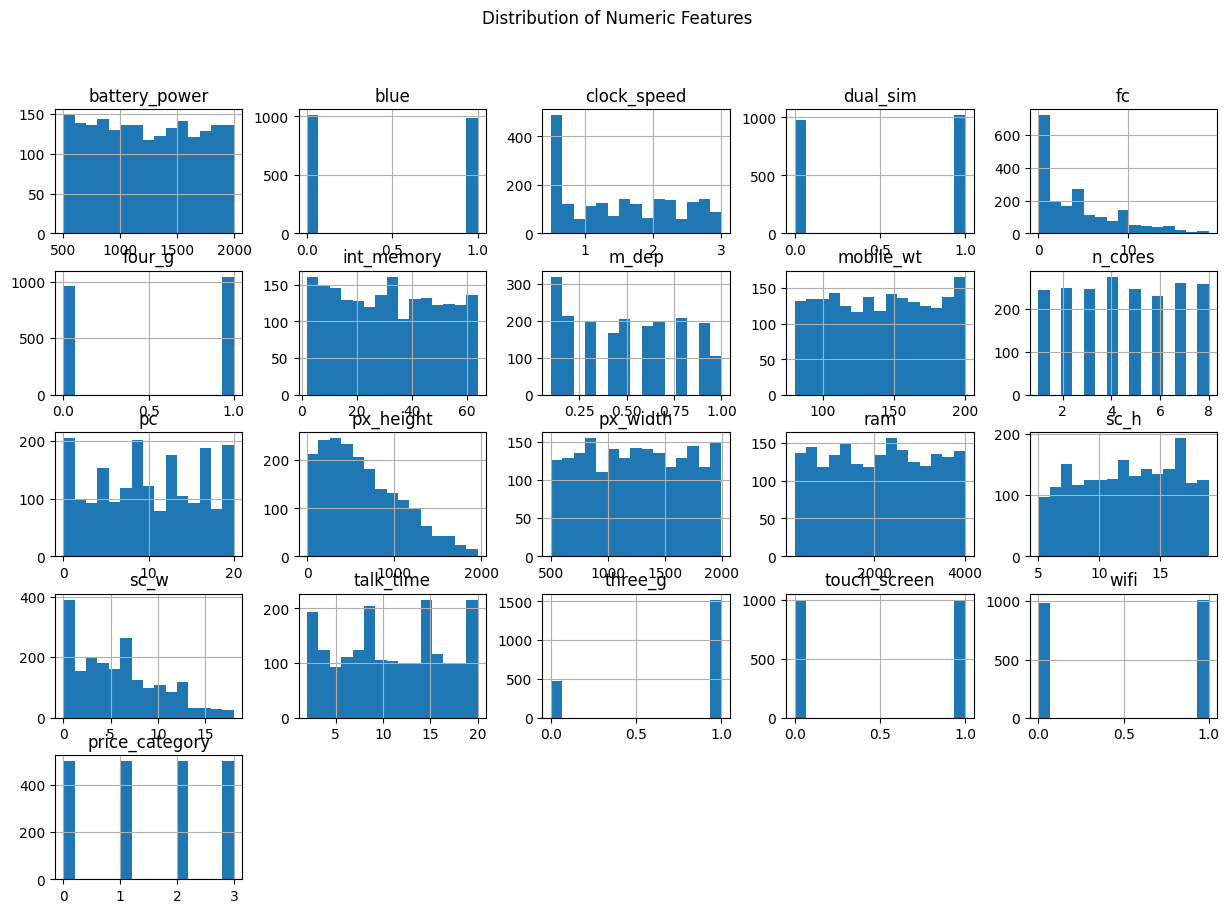

In [ ]:
# Plot histograms for all numeric columns
df.select_dtypes(include=[np.number]).hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()


# **Bivariate Analysis**

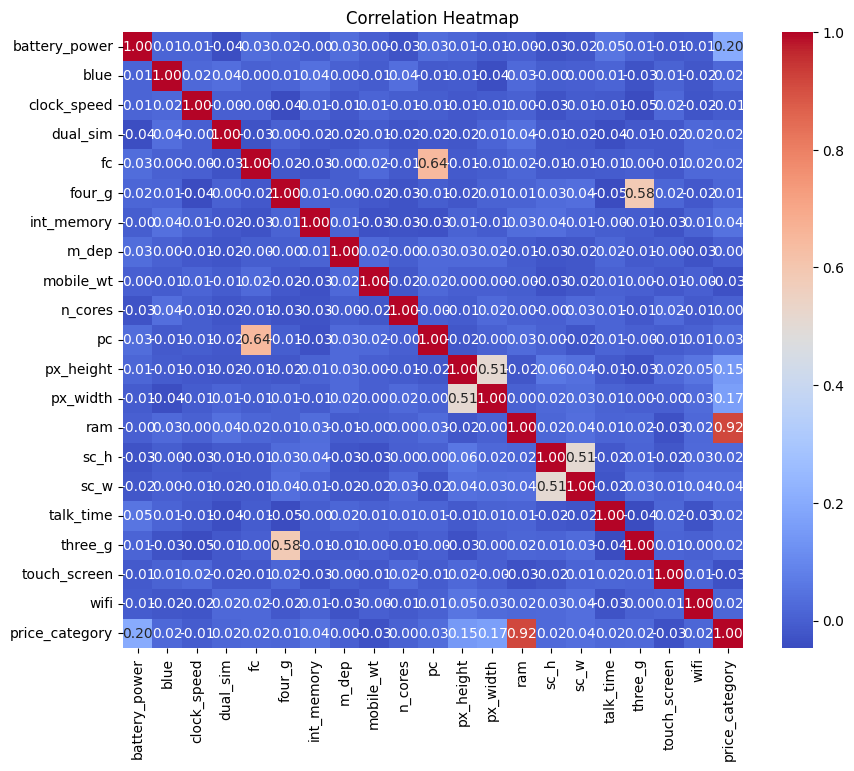

In [ ]:
# Correlation matrix heatmap for numerical features
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In this dataset Ram and Mobile price are highly correlated features.

# **Multivariate Analysis**

In [ ]:
# Pairplot of numerical features, colored by price_category
sns.pairplot(df.select_dtypes(include=[np.number]), hue='price_category', palette='Set1')
plt.suptitle('Pairplot of Features Colored by Price Category', y=1.02)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

Converting categorical values to numerical values.

In [ ]:
# Convert categorical features into numeric using LabelEncoder (e.g., for 'blue', 'dual_sim', etc.)
le = LabelEncoder()
categorical_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_category
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# **Data Spliting**

In [ ]:
X = df.drop('price_category', axis=1)
y = df['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Scalling the data for better modeling.

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Initializing and training the modeling using Logistic Regression.

In [ ]:

y_pred = model.predict(X_test)


# **Model Analysis**

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 97.50%
Confusion Matrix:
 [[101   4   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400

